In [ ]:
!git clone https://github.com/laxmimerit/dog-cat-full-dataset.git

Cloning into 'dog-cat-full-dataset'...
remote: Enumerating objects: 25027, done.
remote: Total 25027 (delta 0), reused 0 (delta 0), pack-reused 25027
Receiving objects: 100% (25027/25027), 541.62 MiB | 16.93 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Checking out files: 100% (25001/25001), done.


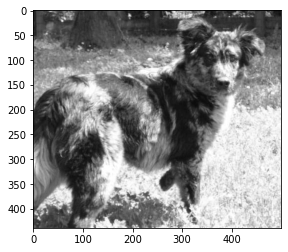

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import os
import cv2

DATADIR = "/content/dog-cat-full-dataset/data/train"
CATEGORIES = ["dogs","cats"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category )
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break

In [ ]:
print(img_array)

[[ 66  57  49 ...  20  22  23]
 [ 57  50  43 ...  21  23  24]
 [ 45  41  38 ...  23  25  26]
 ...
 [ 79  86  96 ... 212 241 244]
 [ 81  87  94 ... 215 242 238]
 [ 83  89  94 ... 223 247 237]]


In [ ]:
print(img_array.shape)

(439, 500)


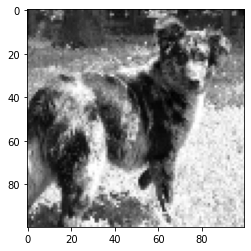

In [ ]:
IMG_SIZE = 100

new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap = 'gray')
plt.show()

In [ ]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category )
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

In [ ]:
print(len(training_data))

20000


In [ ]:
import random 
random.shuffle(training_data)

In [ ]:
for sample in training_data[:10]:
    print(sample[1])

0
1
1
0
1
0
1
0
1
0


In [ ]:
X = []
Y = []

In [ ]:
for features, label in training_data:
    X.append(features)
    Y.append(label)
    #np.array((Y,label))
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE,1)
Y = np.array(Y)

In [ ]:
print(Y)

[0 1 1 ... 0 0 1]


In [ ]:
import pickle 

pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle","wb")
pickle.dump(Y,pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

In [ ]:
X[2]

array([[[207],
        [200],
        [201],
        ...,
        [134],
        [135],
        [136]],

       [[199],
        [209],
        [196],
        ...,
        [142],
        [139],
        [138]],

       [[202],
        [200],
        [213],
        ...,
        [137],
        [141],
        [135]],

       ...,

       [[166],
        [166],
        [166],
        ...,
        [ 14],
        [ 33],
        [ 34]],

       [[165],
        [167],
        [168],
        ...,
        [ 46],
        [ 68],
        [ 26]],

       [[165],
        [167],
        [168],
        ...,
        [  9],
        [ 16],
        [ 26]]], dtype=uint8)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle 

X = pickle.load(open("X.pickle","rb"))
Y = pickle.load(open("Y.pickle","rb"))

#X = X/255.0

model = Sequential()
model.add(Conv2D(256,(3,3),activation='relu',input_shape = X.shape[1:]))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 256)       2560      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 256)       590080    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       295040    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 128)      0

In [ ]:
history = model.fit(X,Y,batch_size=32,epochs=7, validation_split=0.1)

Epoch 1/7
563/563 [==============================] - 46s 63ms/step - loss: 0.8024 - accuracy: 0.5951 - val_loss: 0.6076 - val_accuracy: 0.6785
Epoch 2/7
563/563 [==============================] - 35s 62ms/step - loss: 0.5657 - accuracy: 0.7154 - val_loss: 0.5284 - val_accuracy: 0.7410
Epoch 3/7
563/563 [==============================] - 35s 63ms/step - loss: 0.4958 - accuracy: 0.7624 - val_loss: 0.4441 - val_accuracy: 0.7990
Epoch 4/7
563/563 [==============================] - 35s 62ms/step - loss: 0.4291 - accuracy: 0.8031 - val_loss: 0.4421 - val_accuracy: 0.7965
Epoch 5/7
563/563 [==============================] - 35s 63ms/step - loss: 0.3748 - accuracy: 0.8317 - val_loss: 0.3976 - val_accuracy: 0.8260
Epoch 6/7
563/563 [==============================] - 35s 62ms/step - loss: 0.3260 - accuracy: 0.8555 - val_loss: 0.3652 - val_accuracy: 0.8500
Epoch 7/7
563/563 [==============================] - 36s 64ms/step - loss: 0.2836 - accuracy: 0.8759 - val_loss: 0.3862 - val_accuracy: 0.8345

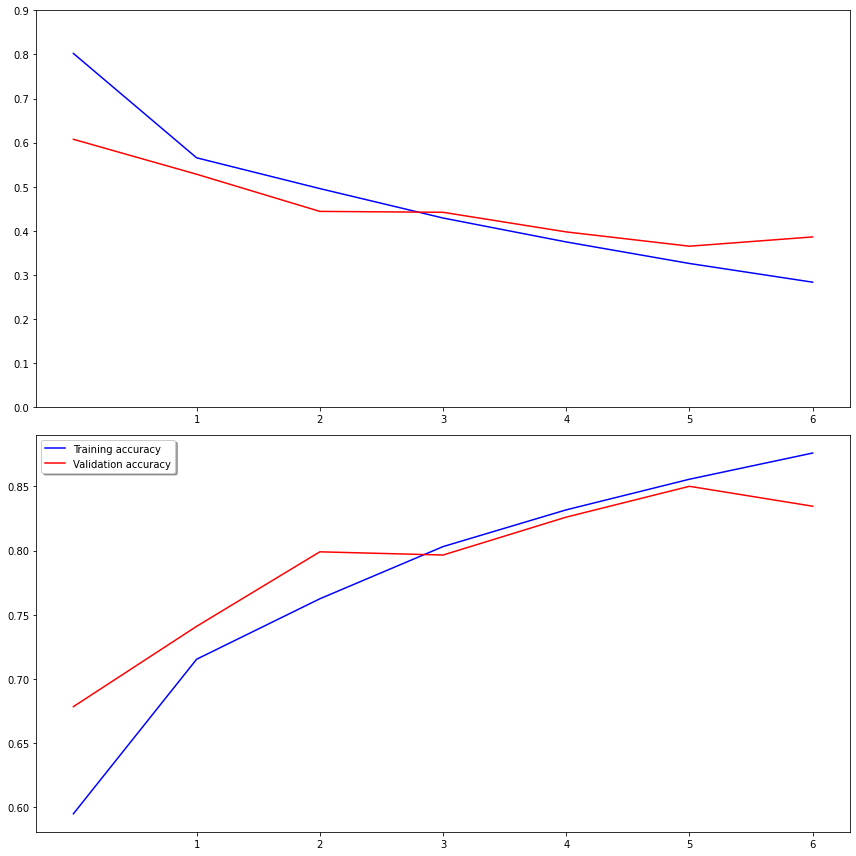

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 7, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 7, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()


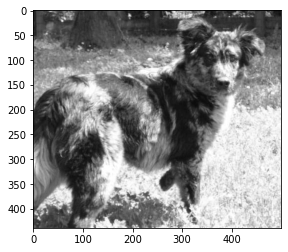

In [ ]:
DATADIR2 = "/content/dog-cat-full-dataset/data/test"
CATEGORIES = ["dogs","cats"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category )
    for img in os.listdir(path):
        img_array2 = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array2,cmap='gray')
        plt.show()
        break
    break

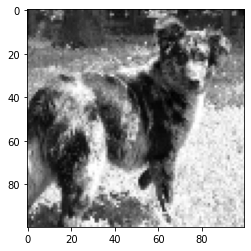

In [ ]:
IMG_SIZE = 100

img_array2 = cv2.resize(img_array2,(IMG_SIZE,IMG_SIZE))
plt.imshow(img_array2,cmap = 'gray')
plt.show()

In [ ]:
test_data = []


def create_test_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR2, category )
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array2 = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array2 = cv2.resize(img_array2,(IMG_SIZE,IMG_SIZE))
                test_data.append([new_array2, class_num])
            except Exception as e:
                pass

create_test_data()

In [ ]:
print(len(test_data))

5000


In [ ]:
import random 
random.shuffle(test_data)

In [ ]:
X_test = []
Y_test = []


In [ ]:
for features, label in test_data:
    X_test.append(features)
    Y_test.append(label)
    #np.array((Y,label))
X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE,1)
Y_test = np.array(Y_test)

In [ ]:
Y_test[:10]

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 0])

In [ ]:
import pickle 

pickle_out = open("X_test.pickle","wb")
pickle.dump(X_test,pickle_out)
pickle_out.close()

pickle_out = open("Y_test.pickle","wb")
pickle.dump(Y_test,pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("X_test.pickle","rb")
X_test = pickle.load(pickle_in)

In [ ]:
X_test[3]

array([[[170],
        [169],
        [171],
        ...,
        [191],
        [185],
        [220]],

       [[167],
        [169],
        [169],
        ...,
        [195],
        [194],
        [218]],

       [[162],
        [166],
        [165],
        ...,
        [182],
        [182],
        [209]],

       ...,

       [[232],
        [227],
        [211],
        ...,
        [132],
        [133],
        [114]],

       [[242],
        [219],
        [211],
        ...,
        [133],
        [132],
        [130]],

       [[237],
        [225],
        [220],
        ...,
        [143],
        [143],
        [135]]], dtype=uint8)

In [ ]:
result = model.evaluate(X_test,Y_test)
print(result)

157/157 [==============================] - 4s 25ms/step - loss: 0.3665 - accuracy: 0.8414
[0.36650052666664124, 0.8414000272750854]


In [ ]:
print('> %.3f' % (result[1] * 100.0))

> 84.140


In [ ]:
print(result)

[0.36650052666664124, 0.8414000272750854]


In [ ]:
from sklearn.metrics import confusion_matrix

pred = model.predict(X_test)
pred = np.where(pred > 0.5, 1, 0) #<--to get the binary category
y_pred = np.argmax(pred, axis=1)

conf_mat = confusion_matrix(Y_test, pred)



157/157 [==============================] - 3s 21ms/step


In [ ]:
print(conf_mat)

[[2301  199]
 [ 594 1906]]


In [ ]:
print(Y_test)
pred[:10]

[0 1 0 ... 1 1 1]


array([[0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0]])

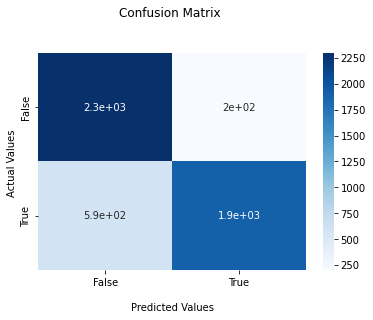

In [ ]:
import seaborn as sns

ax = sns.heatmap(conf_mat, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

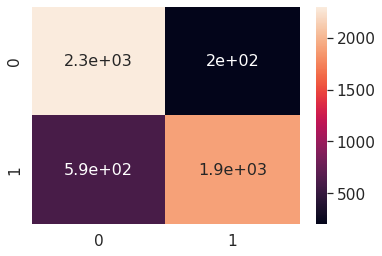

In [ ]:
import pandas as pd
import seaborn as sn
df = pd.DataFrame(conf_mat)
sn.set(font_scale=1.4) # for label size
sn.heatmap(df, annot=True, annot_kws={"size": 16}) # font size

plt.show()

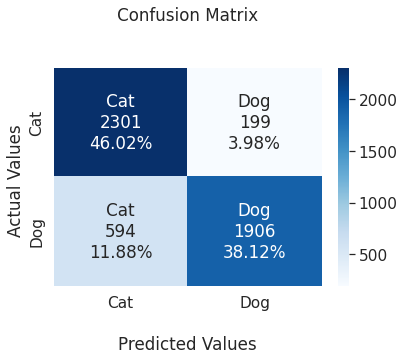

In [ ]:
group_names = ['Cat','Dog','Cat','Dog']

group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     conf_mat.flatten()/np.sum(conf_mat)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(conf_mat, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Cat','Dog'])
ax.yaxis.set_ticklabels(['Cat','Dog'])

## Display the visualization of the Confusion Matrix.
plt.show()